In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
first_image_name = "la_chambre"
second_image_name = "nuit_etoilee"


# Convert the image into a .npy
def convert_image_into_np(filename):
    image = Image.open(f"images/{filename}.jpg")
    image = image.convert('RGB')
    image_array = np.array(image)
    np.save(f'images/{filename}.npy', image_array)
    print("Image converted and saved as image.npy in " + f"images/{filename}.jpg")


convert_image_into_np(first_image_name)
convert_image_into_np(second_image_name)


Image converted and saved as image.npy in images/la_chambre.jpg
Image converted and saved as image.npy in images/nuit_etoilee.jpg


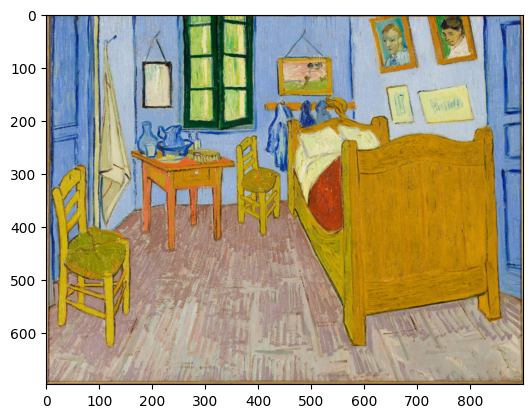

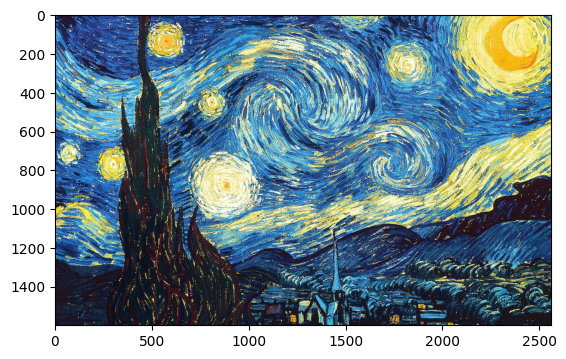

In [3]:
# Load the .npy image
def load_rgb_image_as_np(path):
    with open(path, "rb") as f:
        return np.load(f)

def show_image(rgb_array):
    plt.imshow(rgb_array, cmap='gray')
    plt.show()


first_image_rgb = load_rgb_image_as_np(f"images/{first_image_name}.npy")
second_image_rgb = load_rgb_image_as_np(f"images/{second_image_name}.npy")
show_image(first_image_rgb)
show_image(second_image_rgb)

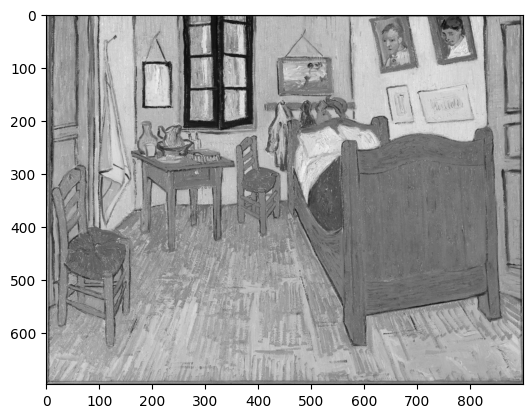

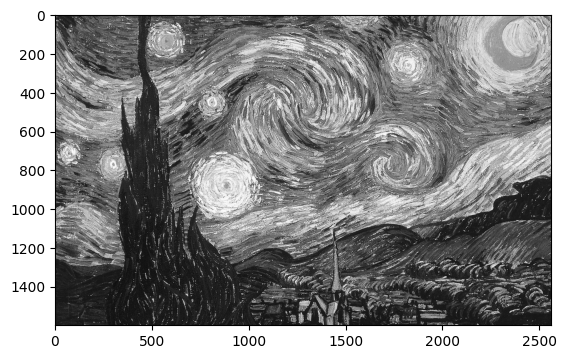

In [4]:
def make_grey_scale(rgb_array): 
    return np.mean(rgb_array, axis=2)

first_image_grey_scale = make_grey_scale(first_image_rgb)
second_image_grey_scale = make_grey_scale(second_image_rgb)
show_image(first_image_grey_scale)
show_image(second_image_grey_scale)

In [5]:


def compress_image_k_clustering(data_points, center_points = None, k = None):
    center_points = np.random.randint(1, 255, size=(k))
    # for broadcast compatibility we reshape center points and data points
    center_points_reshaped = center_points[:, np.newaxis, np.newaxis]
    data_points_reshaped = data_points[np.newaxis, :,  :]
    # it's an np array that will be like this (n, k)
    euclidian_distance = np.abs(center_points_reshaped - data_points_reshaped)
    # from euclidian distance we take the indice of the column with the minimum value for each row
    min_indices = np.argmin(euclidian_distance, axis=0)
    compressed_image= center_points[min_indices]
    show_image(compressed_image)
    return center_points, compressed_image

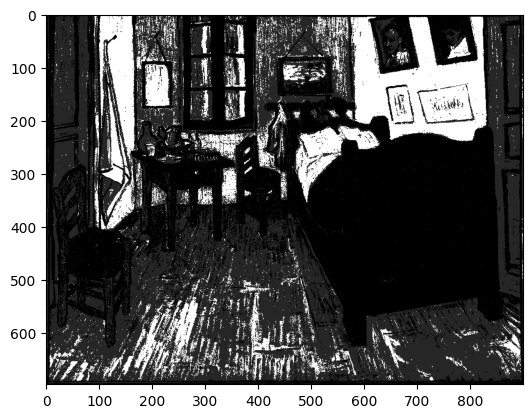

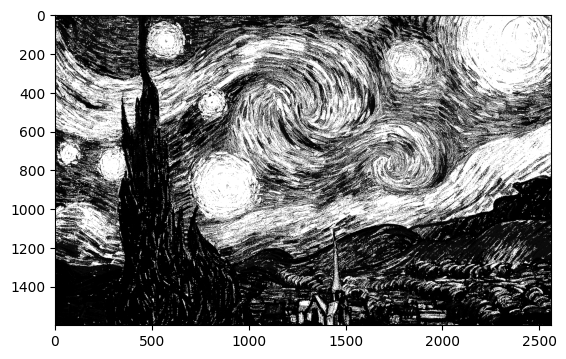

In [10]:
colors_first_image, first_image_grey_scale = compress_image_k_clustering(first_image_grey_scale, None, k=3)
colors_second_image, second_image_grey_scale = compress_image_k_clustering(second_image_grey_scale, None, k=3)

In [7]:
def compress_image_k_mean_clustering(data_points, k):
    def mean_center_points(data_points, colors, k):
        unique_values, counts = np.unique(data_points, return_counts=True)
        mean_center_points = unique_values * counts / counts
        return mean_center_points

    if k > 255:
        raise Exception(f"Can't choose a k superior to the amounts of points ({k} > {255})")
    prev_center_points = np.zeros((k))
    center_points = np.random.randint(1, 255, size=(k))
    while(not np.array_equal(prev_center_points, center_points)):
        colors, data_points = compress_image_k_clustering(data_points, center_points, k)
        prev_center_points = center_points
        center_points = mean_center_points(data_points, colors, k) # returns a (k, 2)

In [8]:
compress_image_k_mean_clustering(second_image_grey_scale, k=4)

NameError: name 'grey_scale_image' is not defined